In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [1]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy

def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended


def is_mjj(month):
    return (month>=5) & (month<=7)


dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'

dir_forcing = '/home/clima-archive2/rfarneti/INPUT_DATA/JRA55-do-1-5-0/'
dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'
#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'
path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

period_str = 1985
period_end = 2004

%matplotlib inline

/tmp/ipykernel_15723/3731587110.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load MOM1
- TAV_OMIP/scripts/processing/prepare_tos_mom.ipynb
- TAV_OMIP/scripts/processing/prepare_zos_mom.ipynb

In [2]:
ssta_mom_atl = xr.open_dataset(path_data_out+'tos_mom_eq_1985_2004.nc')
ssha_mom_atl = xr.open_dataset(path_data_out+'zos_mom_eq_1985_2004.nc')

In [3]:
ssta_mom_eq = Atools.data_sub(ssta_mom_atl,-40,10,-3,3)
ssta_mom_eq_mean =ssta_mom_eq.mean(dim='lat')
std_ssta_mom_eq_mean = ssta_mom_eq_mean.tosa_atl.groupby('time.month').std()

In [4]:
ssha_mom_eq = Atools.data_sub(ssha_mom_atl,-40,10,-3,3)
ssha_mom_eq_mean =ssha_mom_eq.mean(dim='lat')
std_ssha_mom_eq_mean = ssha_mom_eq_mean.zosa_atl.groupby('time.month').std()

# Load MOM1-winds
- TAV_OMIP/scripts/processing/prepare_tos_mom_CORE2_winds.ipynb
- TAV_OMIP/scripts/processing/prepare_zos_mom_CORE2_winds.ipynb

In [5]:
ssta_mom_core2_atl = xr.open_dataset(path_data_out+'tos_mom_core2_eq_1985_2004.nc')
ssha_mom_core2_atl = xr.open_dataset(path_data_out+'zos_mom_core2_eq_1985_2004.nc')

In [6]:
ssta_mom_core2_eq = Atools.data_sub(ssta_mom_core2_atl,-40,10,-3,3)
ssta_mom_core2_eq_mean =ssta_mom_core2_eq.mean(dim='lat')
std_ssta_mom_core2_eq_mean = ssta_mom_core2_eq_mean.tosa_atl.groupby('time.month').std()

In [7]:
ssha_mom_core2_eq = Atools.data_sub(ssha_mom_core2_atl,-40,10,-3,3)
ssha_mom_core2_eq_mean =ssha_mom_core2_eq.mean(dim='lat')
std_ssha_mom_core2_eq_mean = ssha_mom_core2_eq_mean.zosa_atl.groupby('time.month').std()

In [8]:
ssha_mom_core2_atl3  = Atools.data_sub(ssha_mom_core2_atl,-40,10,-3,3)
ssha_mom_core2_atl3_mean = ssha_mom_core2_atl3.mean(dim='lon').mean('lat')

# Figure 10

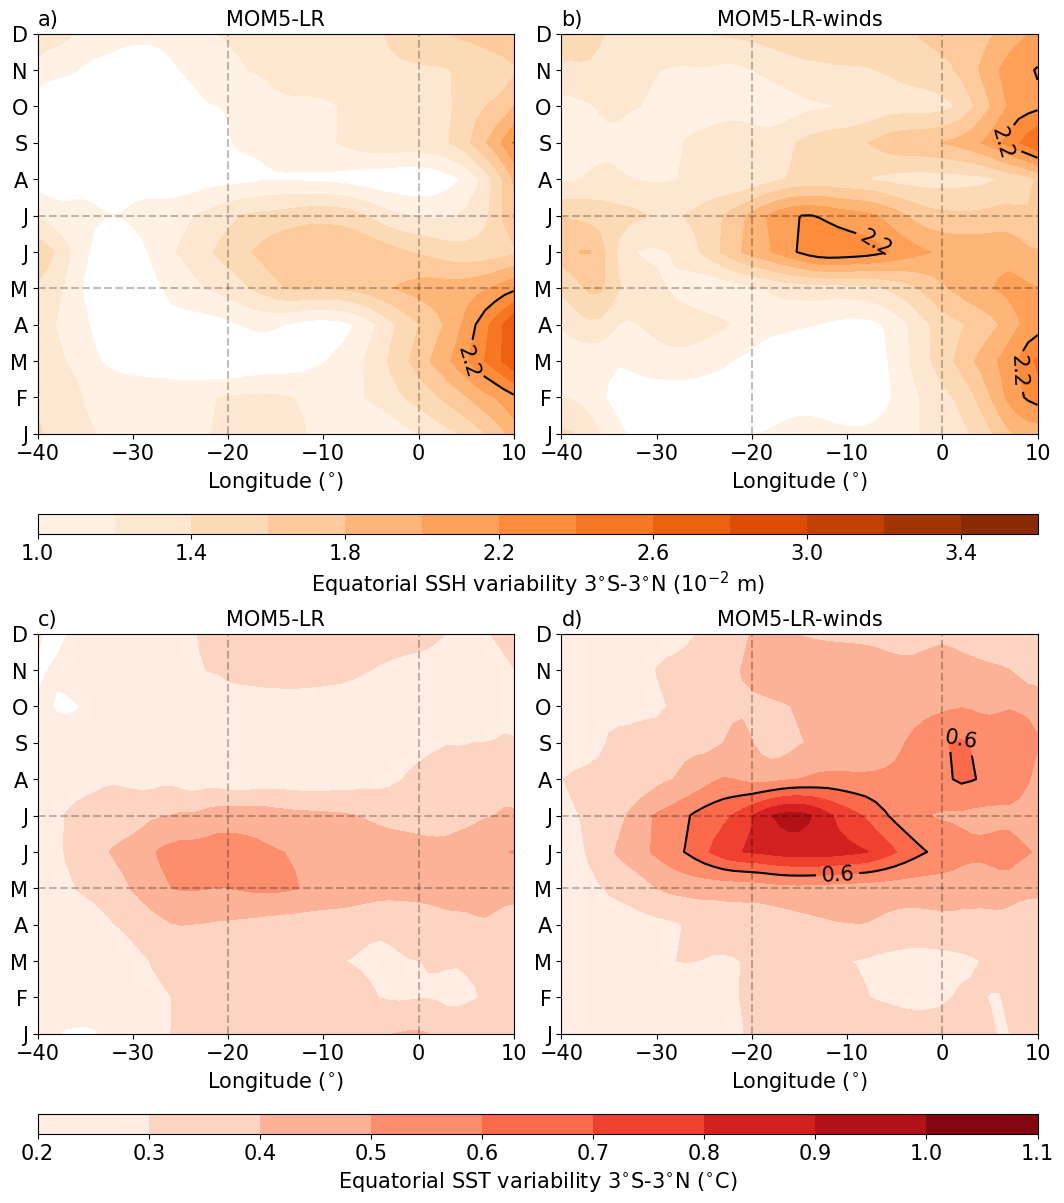

In [9]:
f,ax = plt.subplots(2,2,figsize=[10,10])
f.patch.set_facecolor('white')
ax = ax.ravel()
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
ftz=15
cmap1 = plt.cm.Oranges
levels1= np.arange(1,3.8,0.2)

alpha=0.25
cmap2 = plt.cm.Reds
levels2= np.arange(0.2,1.2,0.1)
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.5, wspace=0.1)
cax0 = inset_axes(ax[0],
                 width='210%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.25,1,1),
                 bbox_transform=ax[0].transAxes,
                 borderpad=0)

cax2 = inset_axes(ax[0],
                 width='210%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.25,1,1),
                 bbox_transform=ax[2].transAxes,
                 borderpad=0)


p0 = ax[0].contourf(std_ssha_mom_eq_mean.lon,
               std_ssha_mom_eq_mean.month,
               std_ssha_mom_eq_mean*100,
               levels=levels1,
               cmap=cmap1)

cs0 = ax[0].contour(std_ssha_mom_eq_mean.lon,
               std_ssha_mom_eq_mean.month,
               std_ssha_mom_eq_mean*100,colors='black',
               levels=[2.2])
ax[0].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[0].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[0].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[0].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[0].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[0].tick_params(labelsize=ftz)
ax[0].set_yticks(std_ssha_mom_eq_mean.month.values)
ax[0].set_yticklabels(month,fontsize = ftz)
ax[0].set_title('MOM5-LR',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SSH variability 3$^{\circ}$S-3$^{\circ}$N (10$^{-2}$ m)',fontsize=ftz)
ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


ax[1].contourf(std_ssha_mom_core2_eq_mean.lon,
               std_ssha_mom_core2_eq_mean.month,
               std_ssha_mom_core2_eq_mean*100,
               levels=levels1,
               cmap=cmap1)

cs0 = ax[1].contour(std_ssha_mom_core2_eq_mean.lon,
               std_ssha_mom_core2_eq_mean.month,
               std_ssha_mom_core2_eq_mean*100,colors='black',
               levels=[2.2])
ax[1].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[1].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[1].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[1].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[1].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[1].tick_params(labelsize=ftz)
ax[1].set_yticks(std_ssha_mom_eq_mean.month.values)
ax[1].set_yticklabels(month,fontsize = ftz)
ax[1].set_title('MOM5-LR-winds',fontsize=ftz)
ax[1].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

p2 = ax[2].contourf(std_ssta_mom_eq_mean.lon,
               std_ssta_mom_eq_mean.month,
               std_ssta_mom_eq_mean,
               levels=levels2,
               cmap=cmap2)

cs0 = ax[2].contour(std_ssta_mom_eq_mean.lon,
               std_ssta_mom_eq_mean.month,
               std_ssta_mom_eq_mean,colors='black',
               levels=[0.6])
ax[2].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[2].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[2].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[2].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[2].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[2].tick_params(labelsize=ftz)
ax[2].set_yticks(std_ssha_mom_eq_mean.month.values)
ax[2].set_yticklabels(month,fontsize = ftz)
ax[2].set_title('MOM5-LR',fontsize=ftz)
cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SST variability 3$^{\circ}$S-3$^{\circ}$N ($^{\circ}$C)',fontsize=ftz)
ax[2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

ax[3].contourf(std_ssta_mom_core2_eq_mean.lon,
               std_ssta_mom_core2_eq_mean.month,
               std_ssta_mom_core2_eq_mean,
               levels=levels2,
               cmap=cmap2)

cs0 = ax[3].contour(std_ssta_mom_core2_eq_mean.lon,
               std_ssta_mom_core2_eq_mean.month,
               std_ssta_mom_core2_eq_mean,colors='black',
               levels=[0.6])
ax[3].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)
ax[3].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[3].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[3].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[3].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[3].set_title('MOM5-LR-winds',fontsize=ftz)
ax[3].tick_params(labelsize=ftz)
ax[3].set_yticks(std_ssha_mom_eq_mean.month.values)
ax[3].set_yticklabels(month,fontsize = ftz)
ax[3].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

ax[0].text(0,1.02,'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,1.02,'b)',transform=ax[1].transAxes,size=ftz)

ax[2].text(0,1.02,'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,1.02,'d)',transform=ax[3].transAxes,size=ftz)
plt.savefig(path_fig+'figure_10.png',bbox_inches='tight',dpi=300)